# SparkMagic

In [1]:
%help

Magic,Example,Explanation
info,%%info,Outputs session information for the current Livy endpoint.
cleanup,%%cleanup -f,"Deletes all sessions for the current Livy endpoint, including this notebook's session. The force flag is mandatory."
delete,%%delete -f -s 0,Deletes a session by number for the current Livy endpoint. Cannot delete this kernel's session.
logs,%%logs,Outputs the current session's Livy logs.
configure,"%%configure -f{""executorMemory"": ""1000M"", ""executorCores"": 4}",Configure the session creation parameters. The force flag is mandatory if a session has already been created and the session will be dropped and recreated.Look at Livy's POST /sessions Request Body for a list of valid parameters. Parameters must be passed in as a JSON string.
spark,%%spark -o dfdf = spark.read.parquet('...,"Executes spark commands. Parameters: -o VAR_NAME: The Spark dataframe of name VAR_NAME will be available in the %%local Python context as a Pandas dataframe with the same name. -m METHOD: Sample method, either take or sample. -n MAXROWS: The maximum number of rows of a dataframe that will be pulled from Livy to Jupyter. If this number is negative, then the number of rows will be unlimited. -r FRACTION: Fraction used for sampling."
sql,%%sql -o tables -qSHOW TABLES,"Executes a SQL query against the variable sqlContext (Spark v1.x) or spark (Spark v2.x). Parameters: -o VAR_NAME: The result of the SQL query will be available in the %%local Python context as a Pandas dataframe. -q: The magic will return None instead of the dataframe (no visualization). -m, -n, -r are the same as the %%spark parameters above."
local,%%locala = 1,All the code in subsequent lines will be executed locally. Code must be valid Python code.


In [2]:
%%configure -f 
{
    "name":"sparkmagic-demo",
    "kind": "spark",
    "executorMemory": "4G", 
    "executorCores": 4,
    "driverMemory": "1000M", 
    "numExecutors": 2
}

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,None,spark,idle,,,


In [3]:
%%spark

// https://spark.apache.org/docs/2.1.0/sql-programming-guide.html
sc.version

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,None,spark,idle,,,✔


SparkSession available as 'spark'.
res2: String = 2.1.0

In [4]:
sc.setLogLevel("WARN")

In [5]:
spark.conf.get("spark.sql.catalogImplementation")

res4: String = in-memory

In [6]:
spark.conf.getAll.foreach(println)

(spark.driver.host,172.26.0.2)
(spark.livy.spark_major_version,2)
(spark.driver.port,44361)
(hive.metastore.warehouse.dir,file:/usr/spark-2.1.0/spark-warehouse/)
(spark.repl.class.uri,spark://172.26.0.2:44361/classes)
(spark.jars,file:/apps/livy-server-0.3.0/rsc-jars/spark-tags_2.10-2.1.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-api-0.3.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/unused-1.0.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/netty-all-4.0.29.Final.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-rsc-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/commons-codec-1.9.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-core_2.11-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-repl_2.11-0.3.0.jar)
(spark.repl.class.outputDir,/tmp/spark8946122617118081304)
(spark.app.name,sparkmagic-demo)
(spark.driver.memory,1000M)
(spark.executor.instances,2)
(spark.executor.id,driver)
(spark.submit.deployMode,client)
(spark.yarn.maxAppAttempts,1)
(spark.master,local)
(spark.

In [7]:
println(sc.version)
sc.getConf.getAll.
    foreach(println)
//     mkString("\n")

(spark.master,local)
(spark.repl.class.outputDir,/tmp/spark8946122617118081304)
(spark.sql.catalogImplementation,in-memory)
(spark.driver.host,172.26.0.2)
(spark.yarn.submit.waitAppCompletion,false)
(spark.executor.id,driver)
(spark.executor.cores,4)
(spark.repl.class.uri,spark://172.26.0.2:44361/classes)
(spark.jars,file:/apps/livy-server-0.3.0/rsc-jars/spark-tags_2.10-2.1.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-api-0.3.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/unused-1.0.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/netty-all-4.0.29.Final.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-rsc-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/commons-codec-1.9.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-core_2.11-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-repl_2.11-0.3.0.jar)
(spark.yarn.maxAppAttempts,1)
(spark.driver.port,44361)
(spark.executor.instances,2)
(spark.app.id,local-1601693000327)
(spark.livy.spark_major_version,2)
(spark.submit.deployMod

# Examples

In [8]:
import org.apache.spark.sql.Dataset
import spark.sqlContext.implicits._

val jsonInCSV: Dataset[String] = sc.parallelize(List(
  """
    |"a","b","c","{""x"":""xx"",""y"":""yy""}"
  """.stripMargin)).toDS()

val df = spark.read.option("escape", "\"").csv(jsonInCSV)
df.show()

<console>:32: error: overloaded method value csv with alternatives:
  (paths: String*)org.apache.spark.sql.DataFrame <and>
  (path: String)org.apache.spark.sql.DataFrame
 cannot be applied to (org.apache.spark.sql.Dataset[String])
       val df = spark.read.option("escape", "\"").csv(jsonInCSV)
                                                  ^


In [9]:
val value = "[\"1978-08-19T19:08:08.788Z\",\"2020-08-19T19:08:08.788Z\"]"
value.substring(2, value.indexOf(',')-1)

res12: String = 1978-08-19T19:08:08.788Z

In [10]:
import java.text.SimpleDateFormat

val pattern = "dd/MM/yyyy HH:mm"

val format = new SimpleDateFormat(pattern)
format.parse("01/01/2018 00:00").getTime()

res15: Long = 1514764800000

In [11]:
import java.text.SimpleDateFormat

def parseDateUDF(p: String) = udf(
  (value: String) => {
    val dateFormat = new SimpleDateFormat(p)
    val parsedDate = dateFormat.parse(value)
    new java.sql.Timestamp(parsedDate.getTime())
  }
)

val pattern = "dd/MM/yyyy HH:mm"

// Example data
val df = Seq(
  Tuple1("01/01/2018 00:00")
).toDF("stringTime")

val newDF = df.withColumn("timestamp", parseDateUDF(pattern)(df("stringTime"))).orderBy("timestamp")
newDF.printSchema()

root
 |-- stringTime: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

# Data loading

### Create DataFrame from CSV file

In [30]:
// http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=dataframereader#pyspark.sql.DataFrameReader.csv

val isoDatePattern = "yyyy-MM-dd'T'HH:mm:ss.SSS'Z'"
val datePattern = "yyyy-MM-dd HH:mm:ss.SSS"

val df = spark.read.
    option("header", "true").
    option("inferSchema", "true").
    option("delimiter", ",").
// Use this line to allow detect Date type
//     option("timestampFormat", datePattern).
// Use this line if one row can have line break
//     option("multiline",true).
// Use this line if one column has JSON confuse with delimiter 
//     option("escape", "\"").
    csv("file:///data/time_series_covid19_deaths_global_narrow.csv")

df: org.apache.spark.sql.DataFrame = [Province/State: string, Country/Region: string ... 8 more fields]

In [31]:
df.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Value: integer (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: integer (nullable = true)
 |-- Sub-region Code: integer (nullable = true)
 |-- Intermediate Region Code: integer (nullable = true)

In [32]:
df.show(1, false)

+--------------+--------------+--------+---------+---------------------+-----+------------------------+-----------+---------------+------------------------+
|Province/State|Country/Region|Lat     |Long     |Date                 |Value|ISO 3166-1 Alpha 3-Codes|Region Code|Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+---------+---------------------+-----+------------------------+-----------+---------------+------------------------+
|null          |Afghanistan   |33.93911|67.709953|2020-10-01 00:00:00.0|1458 |AFG                     |142        |34             |null                    |
+--------------+--------------+--------+---------+---------------------+-----+------------------------+-----------+---------------+------------------------+
only showing top 1 row

### Type conversion

In [33]:
val cleanDf = df.withColumnRenamed("ISO 3166-1 Alpha 3-Codes", "iso_country_code")
cleanDf.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Value: integer (nullable = true)
 |-- iso_country_code: string (nullable = true)
 |-- Region Code: integer (nullable = true)
 |-- Sub-region Code: integer (nullable = true)
 |-- Intermediate Region Code: integer (nullable = true)

In [16]:
val cleanDf = df.
    withColumn("date", unix_timestamp($"date", datePattern).cast("timestamp"))
//     withColumn("timestamp", unix_timestamp($"date", datePattern).cast("timestamp")).
//     drop("date")

cleanDf.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- Value: integer (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: integer (nullable = true)
 |-- Sub-region Code: integer (nullable = true)
 |-- Intermediate Region Code: integer (nullable = true)

### Data processing - By Time Window

In [34]:
// Assess the size first
cleanDf.filter(cleanDf("Date").gt(lit("2020-09-01"))).count()

res55: Long = 8246

In [37]:
// filter data where the date is greater than 2020-09-01
val tsDF = cleanDf.filter(cleanDf("Date").gt(lit("2020-09-01"))).
    groupBy($"iso_country_code", window($"Date", "6 hours")).
    agg(sum('Value) as "casualties").
    orderBy(desc("window.start"))

tsDF.
    show(false)

+----------------+---------------------------------------------+----------+
|iso_country_code|window                                       |casualties|
+----------------+---------------------------------------------+----------+
|NGA             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|1112      |
|SLE             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|72        |
|ESP             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|31973     |
|ZWE             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|228       |
|HND             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|2380      |
|LVA             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|37        |
|BOL             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|8001      |
|MWI             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|179       |
|AGO             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|185       |
|LIE             |[2020-10-01 00:00:00.0,2020-10-01 06:00:00.0]|1         |
|MRT        

### Save data into Table

In [38]:
import org.apache.spark.sql.{SQLContext, SaveMode}

tsDF.write.mode(SaveMode.Overwrite).
    saveAsTable("data")

# Tables

In [20]:
spark.sql("SHOW DATABASES").show()

+------------+
|databaseName|
+------------+
|     default|
+------------+

In [21]:
spark.catalog.listTables("default").show()

+----+--------+-----------+---------+-----------+
|name|database|description|tableType|isTemporary|
+----+--------+-----------+---------+-----------+
+----+--------+-----------+---------+-----------+

### SparkSQL - Data query

In [39]:
%%sql -c sql -o pdf
SELECT window.start as time, iso_country_code, casualties 
FROM data
WHERE iso_country_code = 'FRA'
ORDER BY time

Output()

In [40]:
%%sql
SELECT DAY(window.start) as day, SUM(casualties) as daily_casualties
FROM data
WHERE iso_country_code = 'FRA'
GROUP BY DAY(window.start)
ORDER BY day

Output()

### Using local python

Please make sure matplotlib & panda is install before executing following cells

In [24]:
// import sys  
// !{sys.executable} -m pip install --user matplotlib

In [41]:
%%local
print(pdf.info())
print(pdf.describe())
print(pdf.values)
print(pdf.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
time                31 non-null object
iso_country_code    31 non-null object
casualties          31 non-null int64
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes
None
         casualties
count     31.000000
mean   31001.129032
std      412.766499
min    30518.000000
25%    30628.000000
50%    30884.000000
75%    31292.500000
max    31816.000000
[['2020-09-01T00:00:00.000Z' 'FRA' 30518]
 ['2020-09-02T00:00:00.000Z' 'FRA' 30539]
 ['2020-09-03T00:00:00.000Z' 'FRA' 30559]
 ['2020-09-04T00:00:00.000Z' 'FRA' 30576]
 ['2020-09-05T00:00:00.000Z' 'FRA' 30575]
 ['2020-09-06T00:00:00.000Z' 'FRA' 30573]
 ['2020-09-07T00:00:00.000Z' 'FRA' 30575]
 ['2020-09-08T00:00:00.000Z' 'FRA' 30613]
 ['2020-09-09T00:00:00.000Z' 'FRA' 30643]
 ['2020-09-10T00:00:00.000Z' 'FRA' 30656]
 ['2020-09-11T00:00:00.000Z' 'FRA' 30735]
 ['2020-09-12T00:00:00.000Z' 'FRA' 30735]
 ['2020-09-13T00:00:00.000Z' 'FRA' 307

In [42]:
%%local
import pandas as pd

pdf['timestamp'] = pd.to_datetime(pdf["time"])
pdf.head()

Output()

In [43]:
%%local
print(pdf.dtypes)

time                        object
iso_country_code            object
casualties                   int64
timestamp           datetime64[ns]
dtype: object


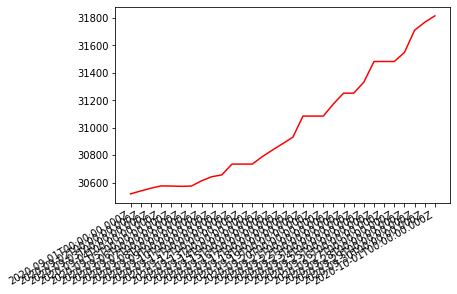

In [44]:
%%local
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(pdf['time'], pdf['casualties'], color='red')
plt.gcf().autofmt_xdate()
plt.show()

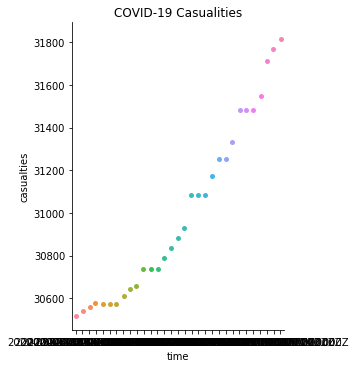

In [45]:
%%local
import matplotlib.pyplot as plt
import seaborn as sns   

sns.catplot(x ='time', y ='casualties', data = pdf)
plt.title('COVID-19 Casualities')
plt.show() 